<span class='note'><i>Make me look good.</i> Click on the cell below and press <kbd>Ctrl</kbd>+<kbd>Enter</kbd>.</span>

In [1]:
from IPython.core.display import HTML
HTML(open('css/custom.css', 'r').read())

<h5 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2020 &middot; Uhan</h5>

<h5 class='lesson'>Lesson 15.</h5>

<h1 class='lesson_title'>Steganography</h1>

## This lesson...

- Warm up: images as matrices
- What is steganography?
- Bit shifting
- Steganography

---

## Warm up

__Example.__
Make a 101 by 101 pixel image of the maritime flag for Z, pictured below. Display your image on the output terminal. 

<img src="img/Zulu.png" alt="Drawing" style="width:200px;padding-bottom:20px;"/>

<center>Figure 1. The maritime flag for Z.</center>

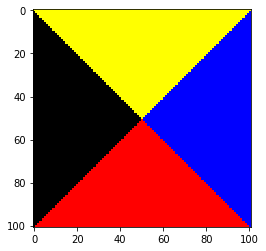

In [13]:
import numpy as np
import matplotlib.pyplot as plt

M = np.zeros((101,101,3),dtype='uint8')
for i in range(101):
    for j in range(101):
        if i <= (100-j) and j >= i: 
            # color yellow
            M[i,j,0]=255
            M[i,j,1]=255
        elif i > (100-j) and j >= i: 
            # color blue
            M[i,j,2]=255
        elif i > j and i > (100-j):
            # color red
            M[i,j,0]=255
plt.imshow(M)

---

## What is steganography?

- Etymology of the word steganography:
    - $ \sigma \tau \epsilon \gamma \alpha \nu o \sigma $ (steganos) - Covered, sheathed, enclosing, etc.
    - $ \gamma \rho \alpha \phi o \sigma $ (graphos) - Writing, drawing, etc.

- __Steganography__ is the practice of concealing messages or information within other nonsecret text or data.
 
- Examples of steganography:
    - Herodotus (440 BC)
        > "When thou art come to Miletus, bid Aristagoras shave thy head, and look thereon."
    - Rear Admiral Jeremiah Denton, USN
        - USNA Class of 1947.
        - POW during Vietnam War.
        - During 1966 televised propaganda interview broadcast to United States he blinked the word "TORTURE" using Morse code.

- __Our goal in this lesson: hiding images in other images.__

## Bit shifting

- Recall from the previous lesson &mdash; for binary numbers:
    - A 1 is also known as an __on bit__ and a 0 is also known as an __off bit__.
    - We index the bits from right to left, starting at 0.
    - The leftmost bit is the __most significant bit__. The rightmost bit is the __least signficant bit__.

- __Bit shifting__ is the act of moving the digits of the binary representation of a number to the left or right.

- For example, starting with $23 = [00010111]_2$:

\begin{align*}
\text{left-shift} & \Longrightarrow [00101110]_2\\
\text{right-shift} & \Longrightarrow [00001011]_2\\
\end{align*}

- Note:
    - when left-shifting, a new 0 was shifted into the rightmost position,
    - when right-shifting, a new 0 was shifted into the leftmost position.

- You can bitshift integers with NumPy using `np.left_shift()` [(documentation)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.left_shift.html) and `np.right_shift()` [(documentation)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.right_shift.html).

__Example.__ Using `np.left_shift()` and `np.right_shift()`, left-shift and right-shift the integer 23 by 1 bit. Does what you get match with the above?

In [15]:
# Left-shift 23 by 1 bit
left_shift = np.left_shift(23, 1)
print(f"Left-shift 23 by 1 bit: {left_shift}")

# Right-shift 23 by 1 bit
right_shift = np.right_shift(23, 1)
print(f"Right-shift 23 by 1 bit: {right_shift}")

Left-shift 23 by 1 bit: 46
Right-shift 23 by 1 bit: 11


_Write your notes here. Double-click to edit._

- If we left-shift 23, we get

    $$
    (0 \times 2^7) + (0 \times 2^6) + (1 \times 2^5) + (0 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (1 \times 2^1) + (0 \times 2^0) = 32 + 8 + 4 + 2 = 46,
    $$
    
    which is what `np.left_shift()` returns.
    
- If we rightft-shift 23, we get

    $$
    (0 \times 2^7) + (0 \times 2^6) + (0 \times 2^5) + (0 \times 2^4) + (1 \times 2^3) + (0 \times 2^2) + (1 \times 2^1) + (1 \times 2^0) = 8 + 2 + 1 = 11,
    $$
    
    which is what `np.right_shift()` returns.

- What happens when we shift a value 2 bits to the right, and then 2 bits to the left?

In [22]:
# 6 = 00000110 in binary
r = 6

# Shift r 2 bits to the right, and then 2 bits to the left
print(np.left_shift(np.right_shift(r, 2), 2))

# 4 = 00000100 in binary

4


- This process zeros out the two rightmost bits (bits 0 and 1), resulting in the 8-bit integer $[00000100]_2$, which is equivalent to 4 in Base 10.

- We can also bit shift entire arrays, such as those representing an image.
 
- The code below shifts the array corresponding to the image file `calico_cat_in_greece.jpg` (in the same folder as this notebook)  6 bits to the right and then back 6 bits to the left.

- This process will zero out the rightmost 6 bits (bits 0, 1, 2, 3, 4, and 5).

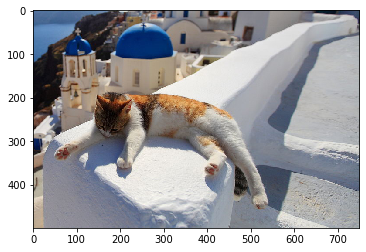

In [23]:
import matplotlib.image as img

# Read image file and store as array
cat = img.imread('calico_cat_in_greece.jpg')

# Show original image
plt.imshow(cat)

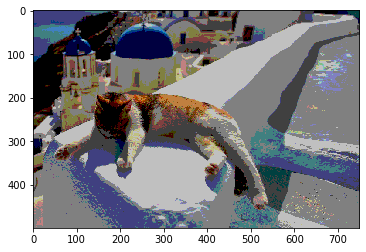

In [21]:
# Bit shift array: 6 to the right, then 6 to the left
cat_new = np.left_shift(np.right_shift(cat, 6), 6)

# Show resulting image
plt.imshow(cat_new)

- Note that the image looks similar, even though we changed 6 out of 8 bits representing the RGB values for each pixel... 🤔

## Steganography

- We use three 8-bit integers to represent the color of each pixel

- How important is each bit?

- Are some more important than others?

- How will switching certain bits to "off" affect the image?

### Turning bits off

- Figure 7 illustrates what happens when we switch the least signficant bit, bit 0, to the "off" position.

<img src="img/bit0a.png" alt="Drawing" style="width:400px;padding-bottom:20px;"/>

<center>Figure 7. Turning bit 0 off.</center>

- The code in the cell below turns "off" bits in order from least significant to most significant.

- Compare the images below.  At what point do you start to be able to see a difference in the image?

/Users/uhan/.pyenv/versions/3.7.6/envs/nelson-3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


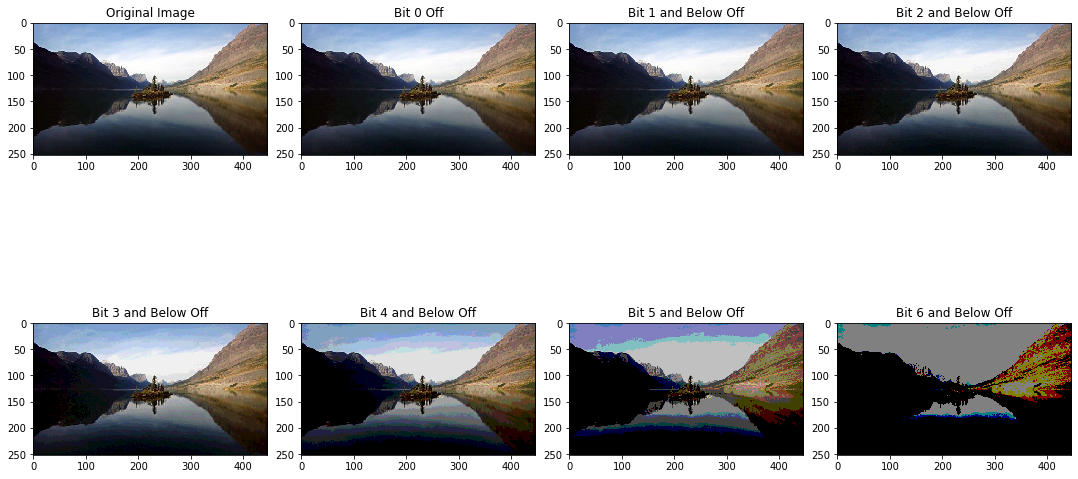

In [26]:
# Read the image file
goose_island = img.imread('GooseIsland.jpg')

# Create figure with size 15 (width) x 10 (height)
fig = plt.figure(figsize=(15, 10))

for i in range(8):
    # Add subplots in order from top left to bottom right
    # Remember that Matplotlib indexes subplots starting at 1
    ax = fig.add_subplot(2, 4, i + 1)
    
    # Shift the image left and right by i bits to zero out the bits in order
    # This will zero out the i rightmost bits
    img_shift = np.left_shift(np.right_shift(goose_island, i), i)
    
    # Plot the shifted image
    plt.imshow(img_shift)
    
    # Set title for subplot
    if i == 0:
        ax.set_title(f"Original Image")
    elif i == 1:
        ax.set_title(f"Bit {i - 1} Off")
    else:
        ax.set_title(f"Bit {i - 1} and Below Off")
        
# Display figure
fig.tight_layout(pad=.8)
fig.show()

- It is clear from the images above that as the bit number increases, the effect on the image increases as well.

### Hiding an image

- Read through the background section of Project 6 in order to get a short overview of the history of steganography with particular emphasis on the experience of the U.S. Navy. 

- Then try the remaining problems, which will guide you through the process of hiding an image!

__Problem 1.__ Load the image in `football_team.jpg` (in the same folder as this notebook) into an array named `cover`. Display the image. We will call this the __cover image__: the image we will use to hide a secret image. 

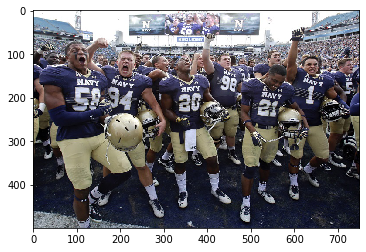

In [27]:
cover = img.imread('football_team.jpg')
plt.imshow(cover)

Bit shift the array `cover` 4 bits to the right and then 4 bits to the left to clear out the 4 lower bits. Call the new array `cover_shifted`. Display the bit shifted image.

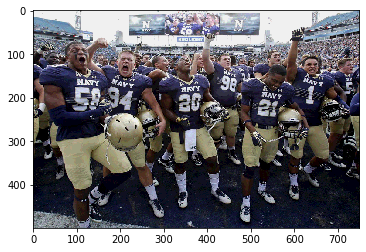

In [28]:
cover_shifted = np.left_shift(np.right_shift(cover, 4), 4)
plt.imshow(cover_shifted)

Now load the image in `enterprise.jpg` into an array named `secret`. We will call this the __secret image__: the image that we will hide and then later recover. Display the secret image. 

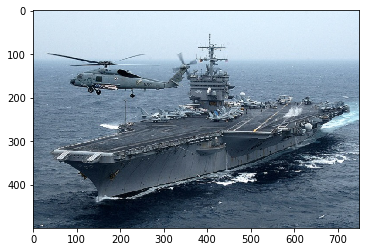

In [29]:
secret = img.imread('enterprise.jpg')
plt.imshow(secret)

Bit shift the array `secret` 4 bits to the right. Call the resulting array `secret_shifted`. Display the image.

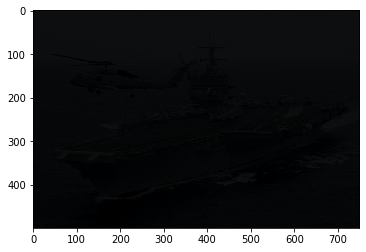

In [30]:
secret_shifted = np.right_shift(secret, 4)
plt.imshow(secret_shifted)

Add the arrays `cover_shifted` and `secret_shifted` together and store the result in an array named `steg`. Display the image. This is the image that we would, say, publish on a website for everyone to see. 

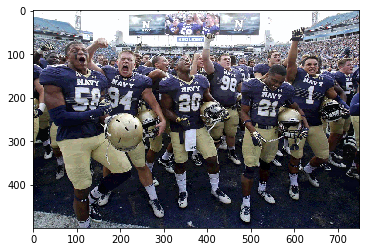

In [50]:
steg = cover_shifted + secret_shifted
plt.imshow(steg)

__Problem 2.__ Now pretend you're the one who needs to recover the secret. Bitshift the array `steg` 4 bits. Store the result in an array named `recovered`. This is the image that we would recover, holding most of the information in `secret`. Display the image corresponding to `recovered`.  

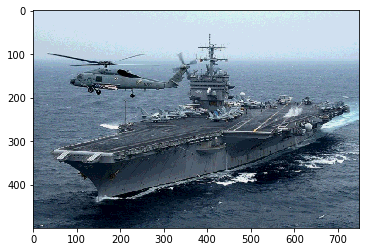

In [51]:
recovered = np.left_shift(steg, 4)
plt.imshow(recovered)

__Problem 3.__
In practice, you would write your `steg` array from Problem 1 to an image file. However, you need to be careful about which _image format_ you use.

The two code cells below show that some errors can occur when using steganography with JPEG files (with extension `.jpg` or `.jpeg`). In particular, the code tries to shift, save, reopen, and recover a picture of the USS Enterprise.

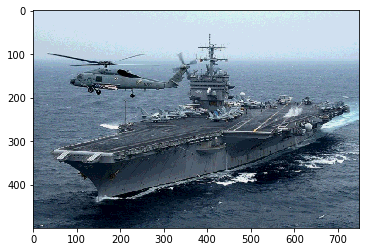

In [52]:
# Load the secret image
secret = img.imread('enterprise.jpg')
plt.imshow(secret)

# Bit shift the secret image
secret_shifted = np.right_shift(secret, 4)
plt.imshow(secret_shifted)

# Recover the secret image. This is what we should get.
secret_recovered_properly = np.left_shift(secret_shifted, 4)
plt.imshow(secret_recovered_properly)

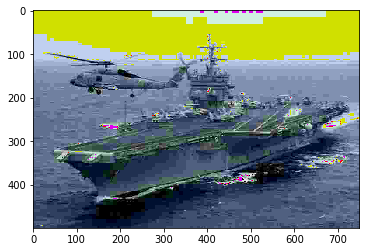

In [55]:
# Save the shifted secret image as a JPEG, which has lossy compression
plt.imsave('secret_shifted_imsave.jpg', secret_shifted)

# Read the image we just wrote into memory
new_secret_shifted_imsave = img.imread('secret_shifted_imsave.jpg')

# Recover the secret image. Note the odd artifacts.
secret_recovered = np.left_shift(new_secret_shifted_imsave, 4)
plt.imshow(secret_recovered)

Why does this happen?
When you save an image as a JPEG file, the image is first compressed: not every color is saved in its original form. This leads to the loss of the less significant bits describing the contents of the pixels. 

Ordinarily, this wouldn't be a problem since our eyes can't see the difference in colors and it would even be a benefit because the compressed image file uses less memory. However, if you are trying to store important information in the less significant bits of the saved image, compression will destroy that data. 

One way to correct this problem is to save our pictures in a format that doesn't try to compress the file. The PNG format is one such format. The code below saves and reads in the picture in PNG format. 

One issue is that when `img.imread()` reads a PNG file, it stores the color values as numbers between 0 and 1 instead of between 0 and 255. To fix this, we multiply the values by 255, round to the nearest integer, and then convert the result to the uint8 format. 

Note that in the code below, the artifacts don't appear in the resulting image! 

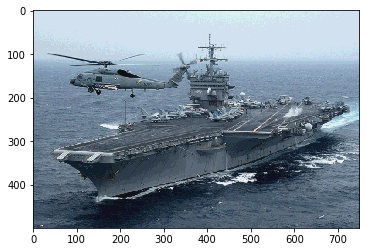

In [54]:
# Obtain secret image and bit shift it
secret = img.imread('enterprise.jpg')
secret_shifted = np.right_shift(secret, 4)

# Save shifted image as PNG, a lossless format!
plt.imsave('secret_shifted_imsave.png', secret_shifted, format='png')

# Read shifted image PNG file back into memory
new_secret_shifted_imsave = img.imread('secret_shifted_imsave.png')

# PNG values are given as floats between 0 and 1 rather than 8-bit
# integers. We multiply by 255, round and convert the results to uint8:
new_secret_as_8bit = (new_secret_shifted_imsave * 255).round().astype(np.uint8)

# Recover the image and display it. Note that the artifacts are gone!
secret_recovered = np.left_shift(new_secret_as_8bit,4)
plt.imshow(secret_recovered)

Save the steganography image from Problems 1 and 2 in PNG format. Recover the secret image from this new file. 

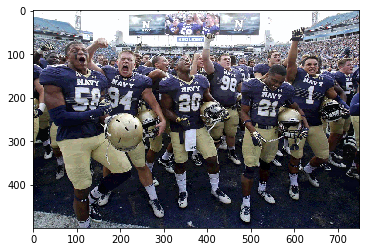

In [56]:
# Show the steganography image
plt.imshow(steg)

# Save shifted image as PNG, a lossless format!
plt.imsave('steg.png', steg, format='png')

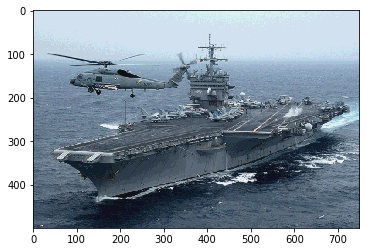

In [59]:
# Read shifted image PNG file back into memory
recovered_png = img.imread('steg.png')

# PNG values are given as floats between 0 and 1 rather than 8-bit
# integers. We multiply by 255, round and convert the results to uint8:
recovered_as_8bit = (recovered_png * 255).round().astype(np.uint8)

# Recover the image and display it. Note that the artifacts are gone!
secret_recovered = np.left_shift(recovered_as_8bit, 4)
plt.imshow(secret_recovered)

### Bonus classwork

Attempt these only once you've completed the problems above.

__Question 6__

Now we'll try a more complicated situation. Download the files `Cinque-terre.jpg` and `Atlantic-Ocean-Road-in-Norway.jpg`. Open both files in Paint (access Paint from the Windows icon in the bottom left of your screen). If you click on the Resize button in the Home ribbon you should get a dialogue box. Click the Pixels button to see the size of the image. You can adjust the image size by entering the new size in the spaces provided. If you want to adjust the size but not leave the ratio of width to height unchanged then unclick the "Maintain aspect ratio" box. Modify one or both of the files so that the two files have the same dimensions. Save the files and then hide one file inside the other. You should be able to reuse most of your code from the last question with minor modifications. Try to recover the hidden file from the steganography file. Now interchange the pictures: what was the cover image before will now be the secret image and vice versa. Again recover the secret image from the steganography file. 

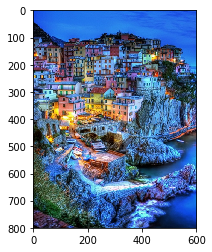

In [20]:
cover = img.imread('Cinque-terre-resized.jpg')
plt.imshow(cover)

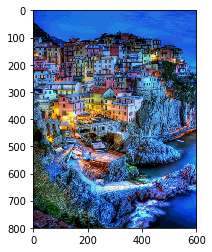

In [21]:
cover_shifted = np.left_shift(np.right_shift(cover,4),4)
plt.imshow(cover_shifted)

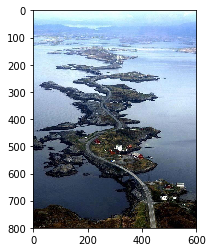

In [22]:
secret = img.imread('Atlantic-Ocean-Road-in-Norway-resized.jpg')
plt.imshow(secret)

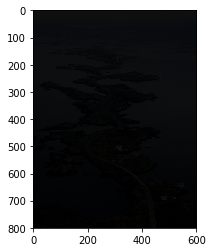

In [23]:
secret_shifted = np.right_shift(secret,4)
plt.imshow(secret_shifted)

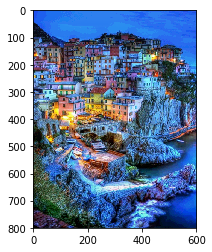

In [24]:
steg = cover_shifted + secret_shifted
plt.imshow(steg)

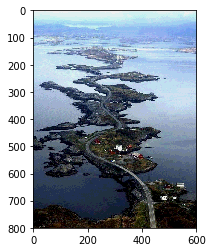

In [25]:
recovered = np.left_shift(steg,4)
plt.imshow(recovered)
# Steg image looks like cover image. Secret image is recovered and 
# looks like original secret image. 

Second part of the question:

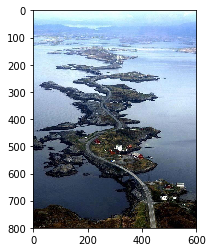

In [26]:
# Change the cover and secret images:
cover = img.imread('Atlantic-Ocean-Road-in-Norway-resized.jpg') 
plt.imshow(cover)

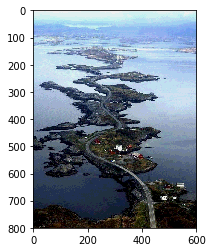

In [27]:
cover_shifted = np.left_shift(np.right_shift(cover,4),4)
plt.imshow(cover_shifted)

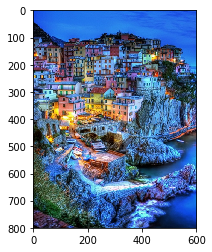

In [28]:
secret = img.imread('Cinque-terre-resized.jpg')
plt.imshow(secret)

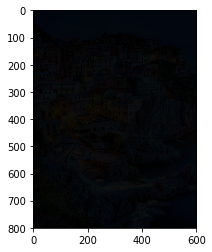

In [29]:
secret_shifted = np.right_shift(secret,4)
plt.imshow(secret_shifted)

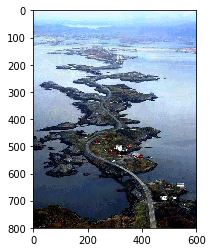

In [30]:
steg = cover_shifted + secret_shifted
plt.imshow(steg)

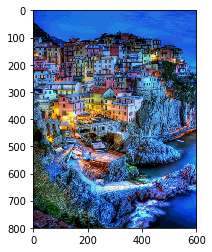

In [31]:
recovered = np.left_shift(steg,4)
plt.imshow(recovered)
# Steg image looks like cover image. Secret image is recovered and 
# looks like original secret image. 

__Question 7__

Download the files `chittorgarh_fort_india.jpg` and `Tuscany-Italy.jpg`. The picture of the fort is smaller than the picture of the Italian countryside. Make a new image that is the same size as the picture of Tuscany but is filled with a single color of your choice. Then change the pixels in the center of the image so that they display the fort. You should obtain an image of the fort with a border around it. Hide the new image of the fort inside the picture of Tuscany. Recover your secret image from the steganography file. Are these good images to use for steganography? Why or why not? 

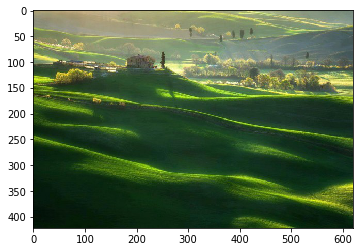

In [32]:
# get cover
cover = img.imread('Tuscany-Italy.jpg') 
plt.imshow(cover)

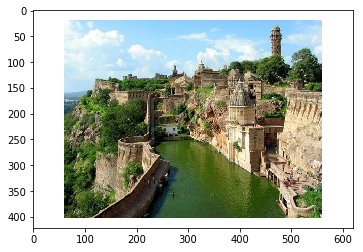

In [33]:
# make secret image
np.shape(cover) # 422, 620, 3
a = 422
b = 620
c = 3
secret = 255*np.ones((a,b,c),dtype='uint8') # white border
fort = img.imread('chittorgarh_fort_india.jpg')
np.shape(fort) # 382, 500, 3
secret[20:402,60:560,0:3]=fort
plt.imshow(secret)

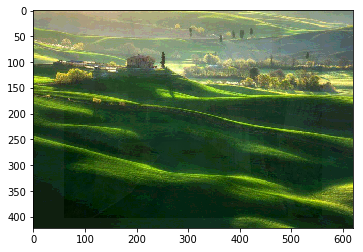

In [34]:
# hide images
cover_shifted = np.left_shift(np.right_shift(cover,4),4)
plt.imshow(cover_shifted)
secret_shifted = np.right_shift(secret,4)
plt.imshow(secret_shifted)
plt.imshow(np.left_shift(secret_shifted,4)) # what we should recover
steg = cover_shifted + secret_shifted
plt.imshow(steg)
# The hidden image bleeds through the steganography image. These 
# are not great images to use for steganography. 

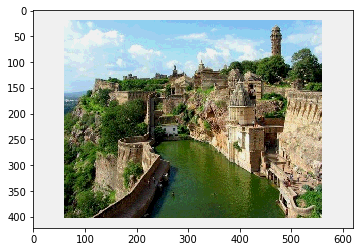

In [35]:
# recover secret image
recovered = np.left_shift(steg,4)
plt.imshow(recovered)